# MLP on the MNIST Dataset

Trains two simple deep NNs on the MNIST dataset.

Gets to 98% validation accuracy after 20 epochs (cross-entropy loss)

Gets to 90.8% validation accuracy after 20 epochs (mean squared loss) (Residual Connection), 90.3% (MLP)

Gets to 94.7% validation accuracy after 100 epochs (mean squared loss) (Residual Connection & MLP)

(there is *a lot* of margin for parameter tuning).

~2 seconds per epoch on a GTX1070 GPU.


## Import Tensorflow package (for Keras) and the MNIST dataset

In [1]:
from __future__ import print_function

# import keras
# from keras.datasets import mnist
# from keras.models import Sequential
# from keras.layers import Dense, Dropout
# from keras.optimizers import RMSprop
# from keras import regularizers

import tensorflow as tf

batch_size = 512
num_classes = 10
epochs = 100

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


# The First Model (Residual Connection)

## Model Setup

Input -> Fully Connected (2048) -> ReLU -> Fully Connected (784) -> Add Input -> ReLU -> Fully Connected (2048) -> ReLU -> Fully Connected (10) -> Mean squared loss

In [2]:
# model
x1 = tf.keras.layers.Input(shape=(784,))
a1 = tf.keras.layers.Dense(2048, activation='relu', use_bias=True)(x1)
a2 = tf.keras.layers.Dense(784, activation='relu', use_bias=True)(a1)
a2 = tf.keras.layers.Add()([a2, x1])
a3 = tf.keras.layers.Dense(2048, activation='relu', use_bias=True)(a2)
y_mlp = tf.keras.layers.Dense(num_classes, activation=None, use_bias=True)(a3)
#y_mlp = tf.keras.layers.Dense(num_classes, activation='softmax', use_bias=True, kernel_regularizer=tf.keras.regularizers.l2(l=0.01))(a3)

model = tf.keras.models.Model(inputs=x1, outputs=y_mlp)

model.summary()

model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 2048)         1607680     input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 784)          1606416     dense_1[0][0]                    
__________________________________________________________________________________________________
add_1 (Add)                     (None, 784)          0           dense_2[0][0]                    
                                                                 input_1[0][0]                    
__________

## Fit the Model using Back Propagation (Vanilla SGD)

In [3]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
#print('Test error:', 1-score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================]60000/60000 [==============================] - 124s 2ms/step - loss: 0.0916 - acc: 0.3541 - val_loss: 0.0705 - val_acc: 0.6052

Epoch 2/100
60000/60000 [==============================]60000/60000 [==============================] - 1s 20us/step - loss: 0.0646 - acc: 0.6676 - val_loss: 0.0584 - val_acc: 0.7297

Epoch 3/100
60000/60000 [==============================]60000/60000 [==============================] - 1s 19us/step - loss: 0.0563 - acc: 0.7468 - val_loss: 0.0526 - val_acc: 0.7796

Epoch 4/100
60000/60000 [==============================]60000/60000 [==============================] - 1s 20us/step - loss: 0.0517 - acc: 0.7850 - val_loss: 0.0489 - val_acc: 0.8072

Epoch 5/100
60000/60000 [==============================]60000/60000 [==============================] - 1s 19us/step - loss: 0.0485 - acc: 0.8083 - val_loss: 0.0462 - val_acc: 0.8234

Epoch 6/100
60000/60000 [=========

60000/60000 [==============================]60000/60000 [==============================] - 1s 19us/step - loss: 0.0203 - acc: 0.9449 - val_loss: 0.0203 - val_acc: 0.9446

Epoch 90/100
60000/60000 [==============================]60000/60000 [==============================] - 1s 19us/step - loss: 0.0202 - acc: 0.9450 - val_loss: 0.0202 - val_acc: 0.9441

Epoch 91/100
60000/60000 [==============================]60000/60000 [==============================] - 1s 19us/step - loss: 0.0202 - acc: 0.9453 - val_loss: 0.0202 - val_acc: 0.9438

Epoch 92/100
60000/60000 [==============================]60000/60000 [==============================] - 1s 18us/step - loss: 0.0201 - acc: 0.9457 - val_loss: 0.0201 - val_acc: 0.9448

Epoch 93/100
60000/60000 [==============================]60000/60000 [==============================] - 1s 19us/step - loss: 0.0200 - acc: 0.9460 - val_loss: 0.0200 - val_acc: 0.9447

Epoch 94/100
60000/60000 [==============================]60000/60000 [=======================

## Loss and Accuracy Plots

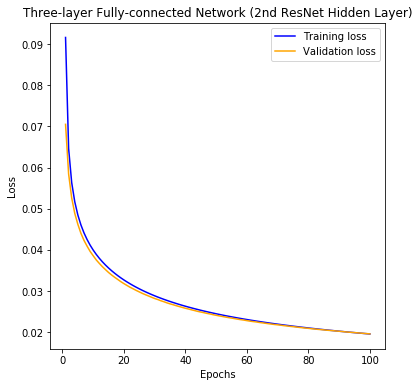

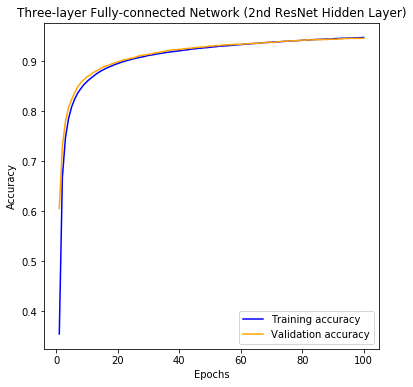

In [4]:
# Plot of Losses
import matplotlib.pyplot as plt

history_dict = history.history
# history_dict.keys()
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

epochs_index = range(1,len(loss_values)+1)

fig_loss = plt.figure(figsize=(6, 6))
plt.plot(epochs_index, loss_values, 'b', label='Training loss')
plt.plot(epochs_index, val_loss_values, 'b', c='orange', label='Validation loss')
plt.title('Three-layer Fully-connected Network (2nd ResNet Hidden Layer)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()



#%%
# Plot of Accuracy
plt.clf()
fig_accuracy = plt.figure(figsize=(6, 6))
plt.plot(epochs_index,acc_values,'b', label='Training accuracy')
plt.plot(epochs_index,val_acc_values,'b', c='orange', label='Validation accuracy')
plt.title('Three-layer Fully-connected Network (2nd ResNet Hidden Layer)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


## Save the Plots

In [5]:
fig_accuracy.savefig('fig_accuracy.eps', format='eps', dpi=2000)

# The Second Model (MLP)

## Model Setup

Input -> Fully Connected (2048) -> ReLU -> Fully Connected (2048) -> ReLU -> Fully Connected (2048) -> ReLU -> Fully Connected (10) -> Mean squared loss

In [6]:
# model
x0 = tf.keras.layers.Input(shape=(784,))
u1 = tf.keras.layers.Dense(2048, activation='relu', use_bias=True)(x0)
u2 = tf.keras.layers.Dense(2048, activation='relu', use_bias=True)(u1)
u3 = tf.keras.layers.Dense(2048, activation='relu', use_bias=True)(u2)
y_mlp_2 = tf.keras.layers.Dense(num_classes, activation=None, use_bias=True)(u3)
#y_mlp = tf.keras.layers.Dense(num_classes, activation='softmax', use_bias=True, kernel_regularizer=tf.keras.regularizers.l2(l=0.01))(a3)

model_2 = tf.keras.models.Model(inputs=x0, outputs=y_mlp_2)

model_2.summary()

model_2.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 2048)              1607680   
_________________________________________________________________
dense_6 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
dense_7 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
dense_8 (Dense)              (None, 10)                20490     
Total params: 10,020,874
Trainable params: 10,020,874
Non-trainable params: 0
_________________________________________________________________


## Fit the Model using Back Propagation (Vanilla SGD)

In [7]:
history_2 = model_2.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score_2 = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score_2[0])
print('Test accuracy:', score_2[1])
#print('Test error:', 1-score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================]60000/60000 [==============================] - 2s 30us/step - loss: 0.0850 - acc: 0.3531 - val_loss: 0.0727 - val_acc: 0.5957

Epoch 2/100
60000/60000 [==============================]60000/60000 [==============================] - 2s 27us/step - loss: 0.0667 - acc: 0.6727 - val_loss: 0.0604 - val_acc: 0.7382

Epoch 3/100
60000/60000 [==============================]60000/60000 [==============================] - 2s 27us/step - loss: 0.0573 - acc: 0.7585 - val_loss: 0.0533 - val_acc: 0.7925

Epoch 4/100
60000/60000 [==============================]60000/60000 [==============================] - 2s 27us/step - loss: 0.0516 - acc: 0.7942 - val_loss: 0.0487 - val_acc: 0.8187

Epoch 5/100
60000/60000 [==============================]60000/60000 [==============================] - 2s 27us/step - loss: 0.0479 - acc: 0.8150 - val_loss: 0.0456 - val_acc: 0.8326

Epoch 6/100
60000/60000 [==========

60000/60000 [==============================]60000/60000 [==============================] - 2s 28us/step - loss: 0.0188 - acc: 0.9456 - val_loss: 0.0186 - val_acc: 0.9454

Epoch 90/100
60000/60000 [==============================]60000/60000 [==============================] - 2s 28us/step - loss: 0.0188 - acc: 0.9459 - val_loss: 0.0186 - val_acc: 0.9449

Epoch 91/100
60000/60000 [==============================]60000/60000 [==============================] - 2s 28us/step - loss: 0.0187 - acc: 0.9463 - val_loss: 0.0185 - val_acc: 0.9454

Epoch 92/100
60000/60000 [==============================]60000/60000 [==============================] - 2s 28us/step - loss: 0.0186 - acc: 0.9464 - val_loss: 0.0184 - val_acc: 0.9457

Epoch 93/100
60000/60000 [==============================]60000/60000 [==============================] - 2s 28us/step - loss: 0.0186 - acc: 0.9470 - val_loss: 0.0184 - val_acc: 0.9457

Epoch 94/100
60000/60000 [==============================]60000/60000 [=======================

## Loss and Accuracy Plots

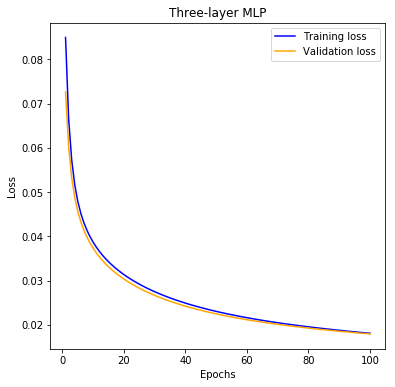

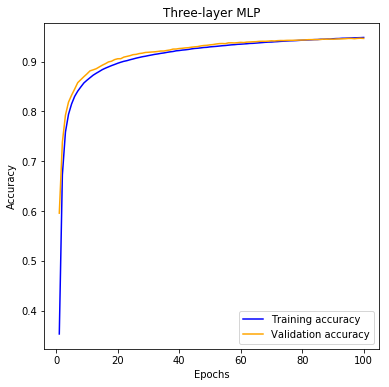

In [8]:
# Plot of Losses
import matplotlib.pyplot as plt

history_dict_2 = history_2.history
# history_dict.keys()
loss_values_2 = history_dict_2['loss']
val_loss_values_2 = history_dict_2['val_loss']
acc_values_2 = history_dict_2['acc']
val_acc_values_2 = history_dict_2['val_acc']

epochs = range(1,len(loss_values)+1)
fig_loss_2 = plt.figure(figsize=(6, 6))
plt.plot(epochs_index, loss_values_2, 'b', label='Training loss')
plt.plot(epochs_index, val_loss_values_2, 'b', c='orange', label='Validation loss')
plt.title('Three-layer MLP')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()



#%%
# Plot of Accuracy
plt.clf()
fig_accuracy_2 = plt.figure(figsize=(6, 6))
plt.plot(epochs_index,acc_values_2,'b', label='Training accuracy')
plt.plot(epochs_index,val_acc_values_2,'b', c='orange', label='Validation accuracy')
plt.title('Three-layer MLP')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Save the Plots

In [9]:
fig_accuracy_2.savefig('fig_accuracy_2.eps', format='eps', dpi=2000)